<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Kaggle-Titanic-competition-dataset" data-toc-modified-id="Load-Kaggle-Titanic-competition-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Kaggle Titanic competition dataset</a></span></li><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-(data-shape,-balance,-etc)" data-toc-modified-id="Descriptive-statistics-(data-shape,-balance,-etc)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics (data shape, balance, etc)</a></span><ul class="toc-item"><li><span><a href="#Target-distribution" data-toc-modified-id="Target-distribution-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Target distribution</a></span></li><li><span><a href="#Selected-features-vs-target-historgrams" data-toc-modified-id="Selected-features-vs-target-historgrams-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Selected features vs target historgrams</a></span></li><li><span><a href="#Data-summary---and-missing-values-analysis" data-toc-modified-id="Data-summary---and-missing-values-analysis-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data summary - and missing values analysis</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Data-leakage-test" data-toc-modified-id="Data-leakage-test-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Data leakage test</a></span></li></ul></li></ul></li><li><span><a href="#ML-template-starts---training-session" data-toc-modified-id="ML-template-starts---training-session-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML template starts - training session</a></span><ul class="toc-item"><li><span><a href="#Training-model-(LGBM)-with-stratisfied-CV" data-toc-modified-id="Training-model-(LGBM)-with-stratisfied-CV-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training model (LGBM) with stratisfied CV</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#Analysis-of-FPs/FNs" data-toc-modified-id="Analysis-of-FPs/FNs-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Analysis of FPs/FNs</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Feature Importance plot</a></span></li></ul></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span><ul class="toc-item"><li><span><a href="#Top-FPs-with-full-features" data-toc-modified-id="Top-FPs-with-full-features-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Top FPs with full features</a></span></li><li><span><a href="#Top-FNs-with-full-features" data-toc-modified-id="Top-FNs-with-full-features-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Top FNs with full features</a></span></li></ul></li><li><span><a href="#Compare-datasets,-for-example:-Train/Test" data-toc-modified-id="Compare-datasets,-for-example:-Train/Test-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Compare datasets, for example: Train/Test</a></span></li></ul></li></ul></div>

In [1]:
import octopus_ml as oc 
import warnings
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
sns.set_style("whitegrid")


pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  
%matplotlib inline
warnings.simplefilter("ignore")

# Load Kaggle Titanic competition dataset 
https://www.kaggle.com/c/titanic

In [2]:
XY_df=pd.read_csv('../datasets/Kaggle_titanic_train.csv')

# EDA and pre-processing 

## Descriptive statistics (data shape, balance, etc)

In [3]:
XY_df.shape

(891, 12)

In [4]:
XY_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target distribution

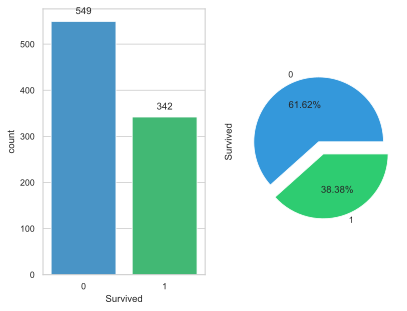

<Figure size 200x300 with 0 Axes>

In [5]:
oc.label_dist(XY_df,'Survived')

### Selected features vs target historgrams 

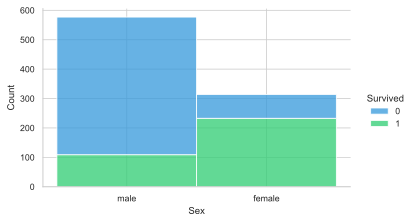

In [6]:
oc.hist_target(XY_df, 'Sex', 'Survived')

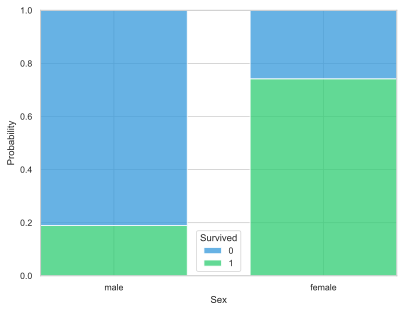

In [7]:
oc.hist_target(XY_df, 'Sex', 'Survived',True)

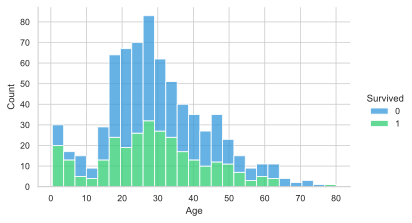

In [8]:
oc.hist_target(XY_df, 'Age', 'Survived')

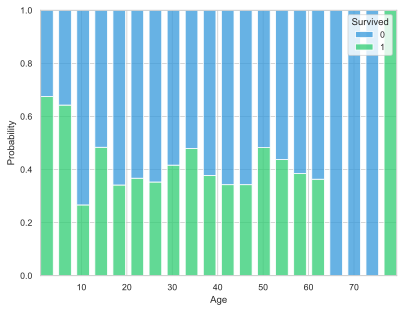

In [9]:
oc.hist_target(XY_df, 'Age', 'Survived',True)

### Data summary - and missing values analysis

In [10]:
# Top 5 sparse features, mainly labs results 
pd.Series(1 - XY_df.count() / len(XY_df)).sort_values(ascending=False).head(10)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
dtype: float64

## Data pre-processing 

In [11]:
XY_df['Cabin'] = XY_df['Cabin'].astype('str').fillna("U0")
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
XY_df['Deck'] = XY_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
XY_df['Deck'] = XY_df['Deck'].map(deck)
XY_df['Deck'] = XY_df['Deck'].fillna(0)
XY_df['Deck'] = XY_df['Deck'].astype('category')

XY_df['relatives'] = XY_df['SibSp'] + XY_df['Parch']
XY_df.loc[XY_df['relatives'] > 0, 'not_alone'] = 0
XY_df.loc[XY_df['relatives'] == 0, 'not_alone'] = 1
XY_df['not_alone'] = XY_df['not_alone'].astype(int)

def encodeAgeFare(train):
    train.loc[train['Age'] <= 16, 'Age_fare'] = 0
    train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_fare'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_fare'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_fare'] = 3
    train.loc[ (train['Age'] > 48) & (train['Age'] <= 80), 'Age_fare'] = 4
    
    train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_adj'] = 1
    train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'Fare_adj'] = 2
    train.loc[(train['Fare'] > 31.0) & (train['Fare'] <= 512.329), 'Fare_adj'] = 3

encodeAgeFare(XY_df)


In [12]:
# Categorical features pre-proccesing  
cat_list ,XY_df=oc.cat_features_proccessing(XY_df)
print (cat_list)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck']


In [13]:
features=XY_df.columns.to_list()
print ('number of features ', len(features))

features_remove=['PassengerId','Survived']
for f in features_remove:
    features.remove(f)

number of features  17


In [14]:
X=XY_df[features]
y=XY_df['Survived']

### Data leakage test 

In [15]:
oc.data_leakage(X,features)

->  Passed the data leakage test - no duplicate intstances detected 
Method Name       : data_leakage
Current memory usage: 0.331003MB
Peak                : 0.47537MB
Total time taken:   10.004 ms 


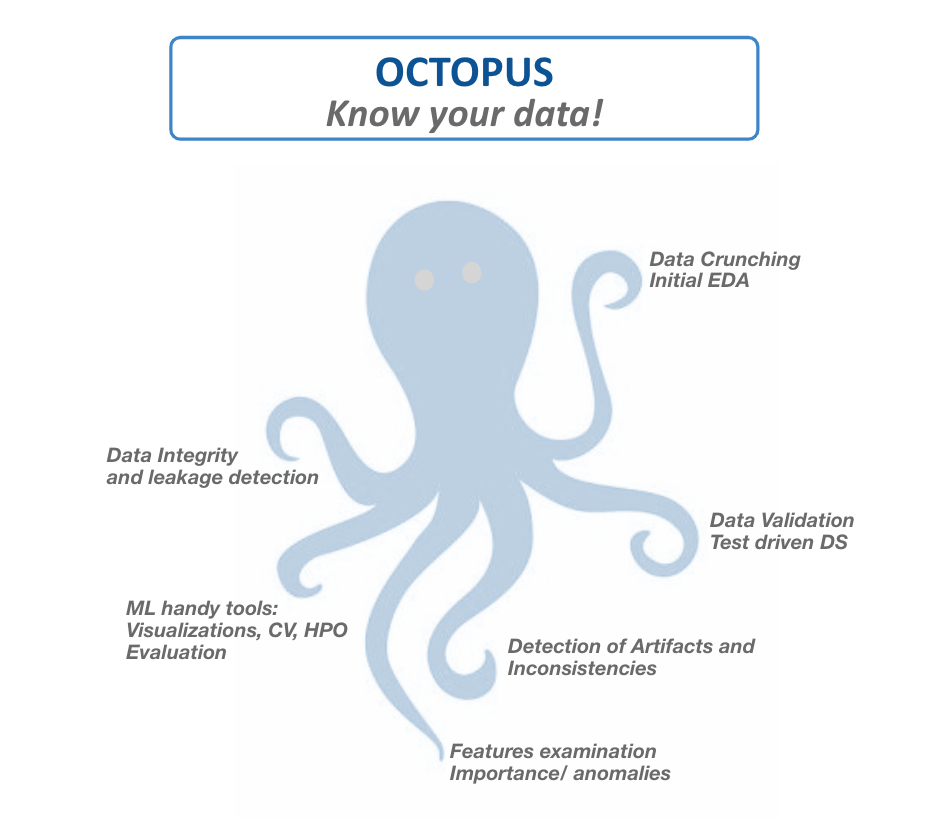

In [16]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

In [17]:
XY_sampled=oc.sampling(XY_df,'Survived',200)

number of positive instances: 342 
number of negative instance :  549
new dataset shape:  (542, 17)
Method Name       : sampling
Current memory usage: 0.361717MB
Peak                : 0.381403MB
Total time taken:   7.087 ms 


# ML template starts - training session 

## Training model (LGBM) with stratisfied CV 

In [18]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    # 'learning_rate': 0.1,
    # 'n_estimators': 100,
    'verbose': -1,
    # 'max_depth': -1,
    # 'seed':100,
    # 'min_split_gain': 0.01,
    # 'num_leaves': 18,
    # 'reg_alpha': 0.01,
    # 'reg_lambda': 1.50,
    # 'feature_fraction':0.2,
    # 'bagging_fraction':0.84
}

metrics = oc.cv_adv(X,
                    y,
                    0.5,
                    10,
                    shuffle=False,
                    params=params,
                    method='full')

--------------------------- Running Cross-Validation - classification, mode: full ---------------------------
-> Starting 5-folds CV - Shuffle: False


2it [00:00, 16.19it/s]

[1]	training's auc: 0.905555	valid_1's auc: 0.823518
[2]	training's auc: 0.908679	valid_1's auc: 0.833399
[3]	training's auc: 0.917069	valid_1's auc: 0.844862
[4]	training's auc: 0.918129	valid_1's auc: 0.839592
[5]	training's auc: 0.919902	valid_1's auc: 0.837022
[6]	training's auc: 0.922622	valid_1's auc: 0.828788
[7]	training's auc: 0.923665	valid_1's auc: 0.824967
[8]	training's auc: 0.923895	valid_1's auc: 0.822793
[9]	training's auc: 0.92515	valid_1's auc: 0.819368
[10]	training's auc: 0.927032	valid_1's auc: 0.818643
[1]	training's auc: 0.912446	valid_1's auc: 0.802741
[2]	training's auc: 0.919134	valid_1's auc: 0.821591
[3]	training's auc: 0.91955	valid_1's auc: 0.820588
[4]	training's auc: 0.922181	valid_1's auc: 0.821257
[5]	training's auc: 0.922817	valid_1's auc: 0.81484
[6]	training's auc: 0.922522	valid_1's auc: 0.818048
[7]	training's auc: 0.92342	valid_1's auc: 0.813837
[8]	training's auc: 0.92384	valid_1's auc: 0.815307
[9]	training's auc: 0.928026	valid_1's auc: 0.8173

5it [00:00, 16.36it/s]

[4]	training's auc: 0.911669	valid_1's auc: 0.879144
[5]	training's auc: 0.915826	valid_1's auc: 0.876738
[6]	training's auc: 0.916308	valid_1's auc: 0.875869
[7]	training's auc: 0.917285	valid_1's auc: 0.878275
[8]	training's auc: 0.919579	valid_1's auc: 0.876805
[9]	training's auc: 0.920731	valid_1's auc: 0.873864
[10]	training's auc: 0.921196	valid_1's auc: 0.875334
[1]	training's auc: 0.898747	valid_1's auc: 0.880202
[2]	training's auc: 0.899617	valid_1's auc: 0.879138
[3]	training's auc: 0.901449	valid_1's auc: 0.877809
[4]	training's auc: 0.902627	valid_1's auc: 0.880535
[5]	training's auc: 0.902918	valid_1's auc: 0.881332
[6]	training's auc: 0.908725	valid_1's auc: 0.887581
[7]	training's auc: 0.911951	valid_1's auc: 0.897554
[8]	training's auc: 0.915768	valid_1's auc: 0.897354
[9]	training's auc: 0.917004	valid_1's auc: 0.900878
[10]	training's auc: 0.917233	valid_1's auc: 0.904268
-> Training final model on the full-set

[1]	training's auc: 0.902625	valid_1's auc: 0.935181
[2]

# Model evaluation 

### Plot of the CV folds - F1 macro and F1 for the positive class 

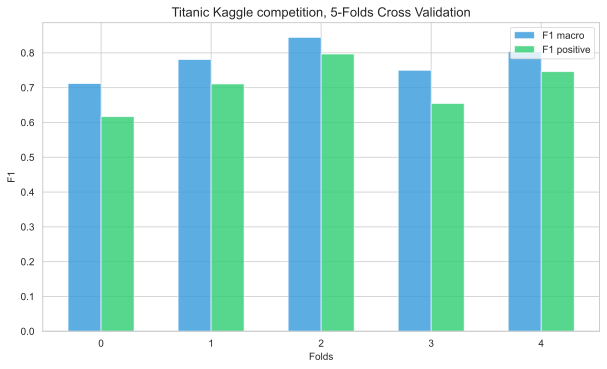

In [19]:
oc.cv_plot(metrics['f1_weighted'],metrics['f1_macro'],metrics['f1_positive'],'Titanic Kaggle competition', mode='full')

### Scikit learn - Classification report 

In [20]:
print(classification_report(metrics['y'], metrics['predictions_folds']))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       549
           1       0.82      0.62      0.71       342

    accuracy                           0.80       891
   macro avg       0.81      0.77      0.78       891
weighted avg       0.81      0.80      0.80       891



### Analysis of FPs/FNs

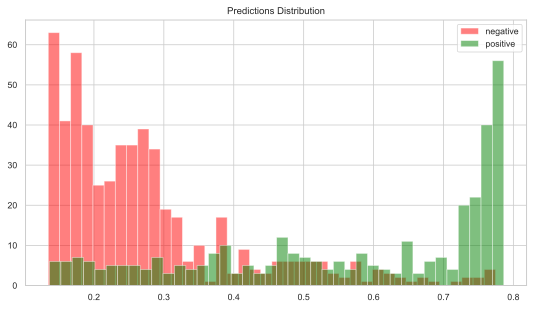

<AxesSubplot:title={'center':'Predictions Distribution'}>

In [21]:
oc.preds_distribution(metrics['y'], metrics['predictions_proba'], bins=40)

### ROC curve with AUC

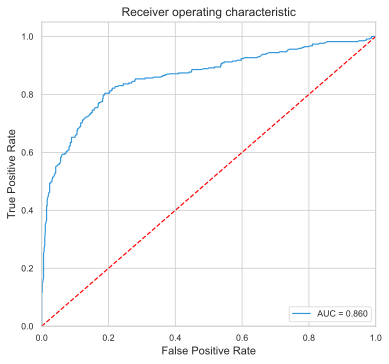

In [22]:
oc.roc_curve_plot(metrics['y'], metrics['predictions_proba'])

### Confusion Matrix plot (normalized and with absolute values) 

<Figure size 640x480 with 0 Axes>

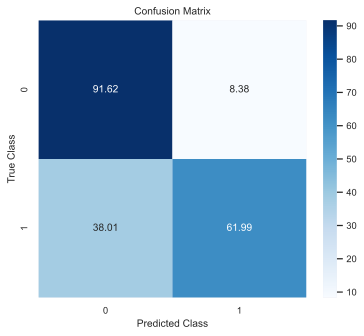

<Figure size 640x480 with 0 Axes>

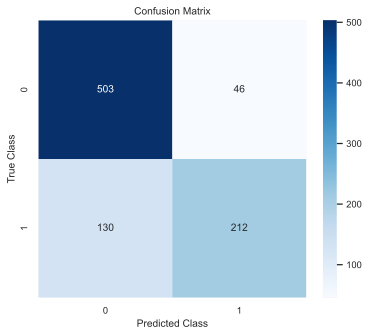

In [23]:
oc.confusion_matrix_plot(metrics['y'], metrics['predictions_folds'])

### Feature Importance plot 

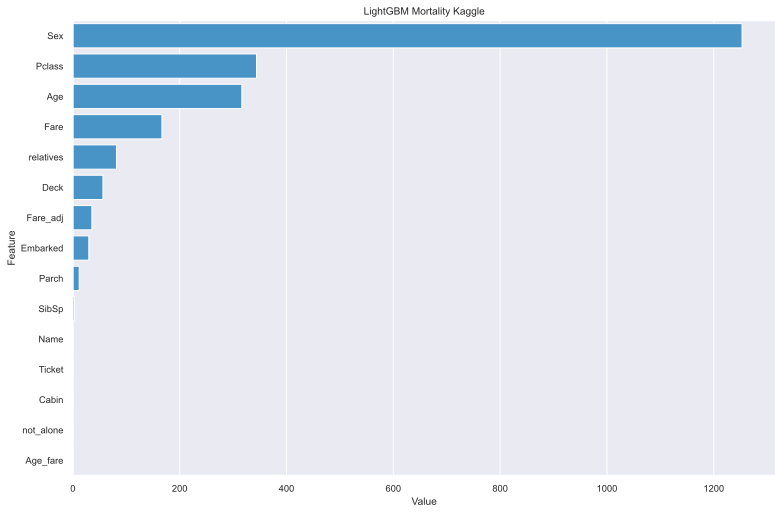

In [24]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'LightGBM Mortality Kaggle',num=16)

In [25]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)

In [26]:
top_features

,Value,Feature
2,1252.974098,Sex
0,343.959864,Pclass
3,316.375859,Age
7,166.752305,Fare
11,81.676926,relatives
10,56.326719,Deck
14,35.625736,Fare_adj
9,29.859244,Embarked
5,11.861670,Parch
4,2.962310,SibSp


## Correlations analysis (on top features)

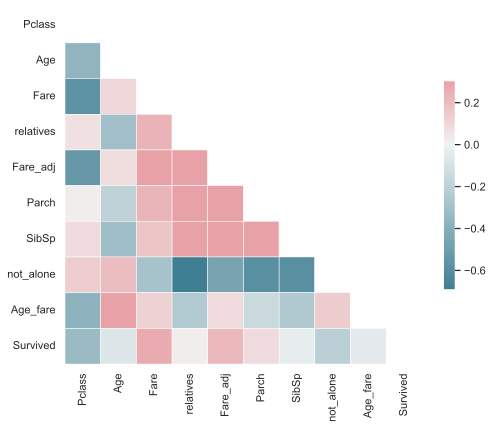

In [27]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('Survived')
oc.correlations(XY_df,list_for_correlations)

Best score using built-in LassoCV: 0.175722


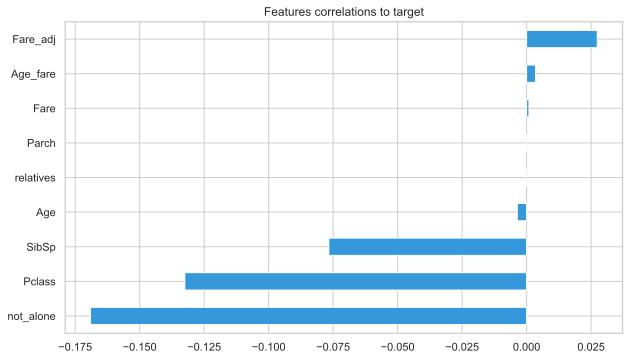

In [28]:
oc.target_corr(X,y,top_features['Feature'].to_list())

In [29]:
fps=oc.recieve_fps(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)
fns=oc.recieve_fns(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)

calculating using threshold of:  0.5
calculating using threshold of:  0.5


In [30]:
fps

,index,label,preds_proba,preds_class
0,177,0,0.774368,1
1,498,0,0.770515,1
2,297,0,0.770035,1
3,199,0,0.759910,1
4,357,0,0.755037,1
5,41,0,0.747041,1
6,772,0,0.728232,1
7,854,0,0.728232,1
8,312,0,0.713483,1
9,593,0,0.680539,1


In [31]:
fns

,index,label,preds_proba,preds_class
0,204,1,0.136412,0
1,283,1,0.136412,0
2,226,1,0.137756,0
3,543,1,0.137855,0
4,107,1,0.137965,0
5,821,1,0.141940,0
6,828,1,0.156977,0
7,391,1,0.158212,0
8,36,1,0.160490,0
9,267,1,0.166475,0


In [32]:
filter_fps  = XY_df[XY_df.index.isin(fps['index'])]
filter_fns  = XY_df[XY_df.index.isin(fns['index'])]
filter_fps_with_prediction=pd.merge(filter_fps,fps[['index','preds_proba']], left_on=[pd.Series(filter_fps.index.values)], right_on=fps['index']) 
filter_fns_with_prediction=pd.merge(filter_fns,fns[['index','preds_proba']], left_on=[pd.Series(filter_fns.index.values)], right_on=fns['index']) 

### Top FPs with full features 

In [33]:
filter_fps_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.0,1,0,11668,21.0000,nan,S,0.0,1,0,1.0,2.0,41,0.747041
1,177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,3.0,0,1,4.0,2.0,177,0.774368
2,199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,nan,S,0.0,0,1,1.0,1.0,199,0.759910
3,297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,0.0,3.0,297,0.770035
4,312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,nan,S,0.0,2,0,1.0,2.0,312,0.713483
5,357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,nan,S,0.0,0,1,2.0,1.0,357,0.755037
6,498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,1.0,3.0,498,0.770515
7,593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,0.0000,nan,Q,0.0,2,0,NaN,NaN,593,0.680539
8,772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,5.0,0,1,4.0,1.0,772,0.728232
9,854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,nan,S,0.0,1,0,2.0,2.0,854,0.728232


### Top FNs with full features 

In [34]:
filter_fns_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,0.0000,nan,C,0.0,0,1,NaN,NaN,36,0.160490
1,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,0.0000,nan,S,0.0,0,1,NaN,NaN,107,0.137965
2,204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,nan,S,0.0,0,1,1.0,1.0,204,0.136412
3,226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,nan,S,0.0,0,1,1.0,1.0,226,0.137756
4,267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,0.0000,nan,S,0.0,1,0,1.0,NaN,267,0.166475
5,283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,nan,S,0.0,0,1,1.0,1.0,283,0.136412
6,391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,0.0000,nan,S,0.0,0,1,1.0,NaN,391,0.158212
7,543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,nan,S,0.0,1,0,1.0,2.0,543,0.137855
8,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,nan,S,0.0,0,1,1.0,1.0,821,0.141940
9,828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,0.0000,nan,Q,0.0,0,1,NaN,NaN,828,0.156977


# Regression with Octopus-ml example


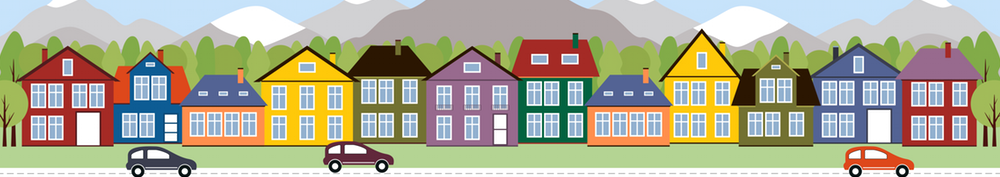

In [35]:
Image("../images/boston.PNG", width=800)

In [36]:
train_df = pd.read_csv ( "../datasets/Kaggle_boston_housing_train.csv")
test_df = pd.read_csv("../datasets/Kaggle_boston_housing_test.csv")

## EDA

In [37]:
train_df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [38]:
# Data shape 
print ("Train set: ",train_df.shape)
print ("Test set: ",test_df.shape)

Train set:  (1460, 81)
Test set:  (1459, 80)


In [39]:
#pip install pandas-summary

In [40]:
# DataFrane Summary by pandas summary package (extension of pandas.describe method) 
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(train_df)
dfs.summary()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.0,1460.0,NaN,1201.0,1460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460.0,1460.0,1460.0,1460.0,NaN,NaN,NaN,NaN,NaN,1452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460.0,NaN,1460.0,1460.0,1460.0,NaN,NaN,NaN,NaN,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,NaN,1460.0,NaN,1460.0,NaN,NaN,1379.0,NaN,1460.0,1460.0,NaN,NaN,NaN,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,NaN,NaN,NaN,1460.0,1460.0,1460.0,NaN,NaN,1460.0
mean,730.5,56.89726,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.19589
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.0,20.0,NaN,21.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1872.0,1950.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN,1900.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,2006.0,NaN,NaN,34900.0
25%,365.75,20.0,NaN,59.0,7553.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1954.0,1967.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,223.0,795.75,NaN,NaN,NaN,NaN,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,NaN,5.0,NaN,0.0,NaN,NaN,1961.0,NaN,1.0,334.5,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,NaN,NaN,129975.0
50%,730.5,50.0,NaN,69.0,9478.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,1973.0,1994.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.5,NaN,0.0,477.5,991.5,NaN,NaN,NaN,NaN,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,NaN,6.0,NaN,1.0,NaN,NaN,1980.0,NaN,2.0,480.0,NaN,NaN,NaN,0.0,25.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2008.0,NaN,NaN,163000.0
75%,1095.25,70.0,NaN,80.0,11601.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,2000.0,2004.0,NaN,NaN,NaN,NaN,NaN,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.25,NaN,0.0,808.0,1298.25,NaN,NaN,NaN,NaN,1391.25,728.0,0.0,1776.75,1.0,0.0,2.0,1.0,3.0,1.0,NaN,7.0,NaN,1.0,NaN,NaN,2002.0,NaN,2.0,576.0,NaN,NaN,NaN,168.0,68.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,8.0,2009.0,NaN,NaN,214000.0
max,1460.0,190.0,NaN,313.0,215245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.0,2010.0,2010.0,NaN,Na

In [41]:
train_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

<Figure size 1200x400 with 0 Axes>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'SalePrice distribution')

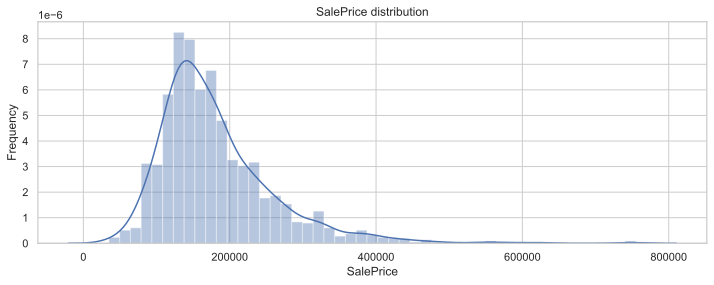

In [52]:

sns.set_style("whitegrid")
plt.figure(figsize=(12,4))

sns.distplot(train_df['SalePrice'] )

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

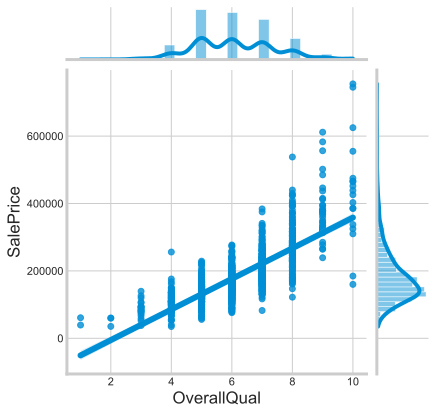

Pearson | P-value: PearsonRResult(statistic=0.7909816005838048, pvalue=2.185675268e-313)


In [69]:
j = sns.jointplot(x=train_df['OverallQual'],y=train_df['SalePrice'],data=train_df, kind='reg', height=6)
plt.show()
print ("Pearson | P-value: "+str(stats.pearsonr(train_df['OverallQual'], y=train_df['SalePrice'])))

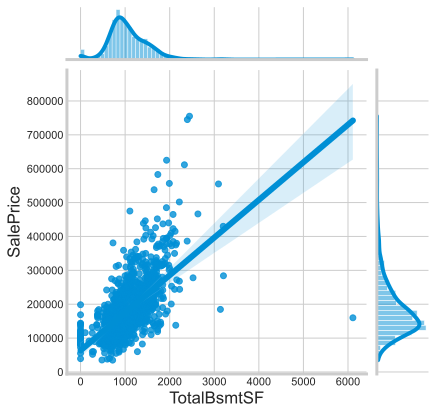

Pearson | P-value: PearsonRResult(statistic=0.6135805515591953, pvalue=9.484229391507914e-152)


In [58]:
sns.set_style("whitegrid")
j = sns.jointplot(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'],data=train_df, kind='reg', height=6)
plt.show()
print ("Pearson | P-value: "+str(stats.pearsonr(train_df['TotalBsmtSF'], y=train_df['SalePrice'])))

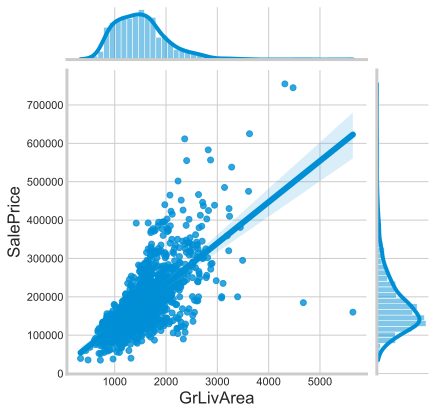

Pearson: 0.7086| P-value: 4.518033646779945e-223


In [60]:
sns.set_style("whitegrid")
j = sns.jointplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],data=train_df, kind='reg', height=6)
plt.show()
print ("Pearson: "+str(round(stats.pearsonr(train_df['GrLivArea'], y=train_df['SalePrice'])[0],4))+"| P-value: "+ str(stats.pearsonr(train_df['GrLivArea'], y=train_df['SalePrice'])[1]))

## Data pre-processing 

In [53]:
train_df['SalePrice'] = np.log1p(train_df["SalePrice"])
y = train_df['SalePrice']
test_id = test_df['Id']
data = pd.concat([train_df, test_df], axis=0, sort=False)
data = data.drop(['Id', 'SalePrice'], axis=1)

In [54]:
numerical_feat = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea']
categorical_feat = ['MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'Exterior2nd', 'Electrical', 'Exterior1st', 'SaleType']

In [55]:
for cat_feat in categorical_feat:
    data[cat_feat] = data[cat_feat].fillna(str(data[cat_feat][:len(train_df)].value_counts().index[0]))

In [57]:
for num_feet in numerical_feat:
    data[num_feet] = data[num_feet].fillna(data[num_feet][:len(train_df)].mean())

In [58]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['SumOverAll'] = data['OverallQual'] + data['OverallCond']

In [59]:
numeric_feats = data.dtypes[data.dtypes != 'object'].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr     4.302254 
BsmtFinSF2       4.146051 
EnclosedPorch    4.003891 
ScreenPorch      3.946694 
BsmtHalfBath     3.931374 
OpenPorchSF      2.535114 
WoodDeckSF       1.842433 
TotalSF          1.515805 
1stFlrSF         1.469604 
BsmtFinSF1       1.425228 
MSSubClass       1.375457 
GrLivArea        1.269358 
TotalBsmtSF      1.162470 
BsmtUnfSF        0.919493 
2ndFlrSF         0.861675 
TotRmsAbvGrd     0.758367 
Fireplaces       0.733495 
HalfBath         0.694566 
BsmtFullBath     0.623973 
OverallCond      0.570312 
SumOverAll      -0.564123 
YearBuilt       -0.599806 
dtype: float64

In [60]:
for feat in high_skew.index:
    data[feat] = np.log1p(data[feat])

In [64]:
train = data[:len(train_df)]
test = data[len(train_df):]
X=train

In [65]:
features=train.columns.to_list()
print ('Number of features ', len(features))

Number of features  81


In [68]:
# Categorical features

categorical_features=[]
for c in train.columns:
    col_type = train[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        train[c] = train[c].astype('category')
        categorical_features.append(c)
print (categorical_features)
X=train

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Octopus ML - regression model adjusments


In [69]:
params = {
'boosting_type': 'gbdt',
'objective': 'regression',
'metric': 'rmse',
}

metrics= oc.cv_adv(X,y,0.5,100,shuffle=True,params=params, mode="regression") 

--------------------------- Running Cross-Validation - regression, mode: full ---------------------------
-> Starting 5-folds CV - Shuffle: True


0it [00:00, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 76
[LightGBM] [Info] Start training from score 12.021409
[1]	training's rmse: 0.368272	valid_1's rmse: 0.353612
[2]	training's rmse: 0.337939	valid_1's rmse: 0.32349
[3]	training's rmse: 0.310783	valid_1's rmse: 0.297383
[4]	training's rmse: 0.286604	valid_1's rmse: 0.273997
[5]	training's rmse: 0.265099	valid_1's rmse: 0.254344
[6]	training's rmse: 0.245714	valid_1's rmse: 0.237111
[7]	training's rmse: 0.228805	valid_1's rmse: 0.221722
[8]	training's rmse: 0.21368	valid_1's rmse: 0.208713
[9]	training's rmse: 0.199251	valid_1's rmse: 0.196737
[10]	training's rmse: 0.187195	valid_1's rmse: 0.186036
[11]	training's rmse: 0.175738	valid_1's rmse: 0.176806
[12]	training's rmse: 0.165594	valid_1's rmse: 0.1

1it [00:00,  1.33it/s]

[75]	training's rmse: 0.0514677	valid_1's rmse: 0.0453523
[76]	training's rmse: 0.0509157	valid_1's rmse: 0.0449002
[77]	training's rmse: 0.0504712	valid_1's rmse: 0.0444098
[78]	training's rmse: 0.0500302	valid_1's rmse: 0.043975
[79]	training's rmse: 0.0496026	valid_1's rmse: 0.0436992
[80]	training's rmse: 0.0491157	valid_1's rmse: 0.0432878
[81]	training's rmse: 0.0487292	valid_1's rmse: 0.0429487
[82]	training's rmse: 0.0483476	valid_1's rmse: 0.0425884
[83]	training's rmse: 0.0478988	valid_1's rmse: 0.0421675
[84]	training's rmse: 0.0474118	valid_1's rmse: 0.0417138
[85]	training's rmse: 0.0470306	valid_1's rmse: 0.0414063
[86]	training's rmse: 0.0466243	valid_1's rmse: 0.0409435
[87]	training's rmse: 0.0462299	valid_1's rmse: 0.0405274
[88]	training's rmse: 0.0458798	valid_1's rmse: 0.0401166
[89]	training's rmse: 0.0454742	valid_1's rmse: 0.0396569
[90]	training's rmse: 0.0450655	valid_1's rmse: 0.0393495
[91]	training's rmse: 0.0445982	valid_1's rmse: 0.0390657
[92]	training's

2it [00:01,  1.63it/s]

[1]	training's rmse: 0.365781	valid_1's rmse: 0.389062
[2]	training's rmse: 0.33577	valid_1's rmse: 0.357789
[3]	training's rmse: 0.308876	valid_1's rmse: 0.329521
[4]	training's rmse: 0.284885	valid_1's rmse: 0.303878
[5]	training's rmse: 0.263566	valid_1's rmse: 0.281543
[6]	training's rmse: 0.244444	valid_1's rmse: 0.261194
[7]	training's rmse: 0.227536	valid_1's rmse: 0.243244
[8]	training's rmse: 0.211842	valid_1's rmse: 0.227262
[9]	training's rmse: 0.197654	valid_1's rmse: 0.21288
[10]	training's rmse: 0.184904	valid_1's rmse: 0.199346
[11]	training's rmse: 0.173693	valid_1's rmse: 0.187291
[12]	training's rmse: 0.1636	valid_1's rmse: 0.176962
[13]	training's rmse: 0.15493	valid_1's rmse: 0.167929
[14]	training's rmse: 0.146899	valid_1's rmse: 0.159397
[15]	training's rmse: 0.139684	valid_1's rmse: 0.151442
[16]	training's rmse: 0.133164	valid_1's rmse: 0.144351
[17]	training's rmse: 0.127425	valid_1's rmse: 0.138026
[18]	training's rmse: 0.122473	valid_1's rmse: 0.132678
[19]	t

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3677
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 78
[LightGBM] [Info] Start training from score 12.024057
[1]	training's rmse: 0.365781	valid_1's rmse: 0.376531
[2]	training's rmse: 0.33577	valid_1's rmse: 0.346876
[3]	training's rmse: 0.308876	valid_1's rmse: 0.319697
[4]	training's rmse: 0.284885	valid_1's rmse: 0.296001
[5]	training's rmse: 0.263566	valid_1's rmse: 0.275455
[6]	training's rmse: 0.244444	valid_1's rmse: 0.255787
[7]	training's rmse: 0.227536	valid_1's rmse: 0.238705
[8]	training's rmse: 0.211842	valid_1's rmse: 0.221931
[9]	training's rmse: 0.197654	valid_1's rmse: 0.207032
[10]	training's rmse: 0.184904	valid_1's rmse: 0.194202
[11]	training's rmse: 0.173693	valid_1's rmse: 0.183056
[12]	training's rmse: 0.1636	valid_1's rmse: 0.17

3it [00:01,  1.62it/s]

[94]	training's rmse: 0.0433435	valid_1's rmse: 0.0454115
[95]	training's rmse: 0.0429473	valid_1's rmse: 0.0449782
[96]	training's rmse: 0.0426203	valid_1's rmse: 0.0446683
[97]	training's rmse: 0.0423088	valid_1's rmse: 0.0442988
[98]	training's rmse: 0.0420158	valid_1's rmse: 0.0440945
[99]	training's rmse: 0.0416639	valid_1's rmse: 0.043742
[100]	training's rmse: 0.0413015	valid_1's rmse: 0.0433961
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3430
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 77
[LightGBM] [Info] Start training from score 12.032956
[1]	training's rmse: 0.369486	valid_1's rmse: 0.351913
[2]	training's rmse: 0.339203	valid_1's rmse: 0.325194
[3]	training's rmse: 0.312049	valid_1's rmse: 0.300087
[4]	training's rmse: 0.287589	valid_1's rmse: 0.279304
[5]	training's rmse: 0.26603	

4it [00:02,  1.70it/s]

[LightGBM] [Info] Start training from score 12.024057
[1]	training's rmse: 0.365781	valid_1's rmse: 0.349897
[2]	training's rmse: 0.33577	valid_1's rmse: 0.320579
[3]	training's rmse: 0.308876	valid_1's rmse: 0.294601
[4]	training's rmse: 0.284885	valid_1's rmse: 0.271146
[5]	training's rmse: 0.263566	valid_1's rmse: 0.249693
[6]	training's rmse: 0.244444	valid_1's rmse: 0.231619
[7]	training's rmse: 0.227536	valid_1's rmse: 0.216042
[8]	training's rmse: 0.211842	valid_1's rmse: 0.200708
[9]	training's rmse: 0.197654	valid_1's rmse: 0.186437
[10]	training's rmse: 0.184904	valid_1's rmse: 0.174339
[11]	training's rmse: 0.173693	valid_1's rmse: 0.163558
[12]	training's rmse: 0.1636	valid_1's rmse: 0.154084
[13]	training's rmse: 0.15493	valid_1's rmse: 0.146173
[14]	training's rmse: 0.146899	valid_1's rmse: 0.138122
[15]	training's rmse: 0.139684	valid_1's rmse: 0.131699
[16]	training's rmse: 0.133164	valid_1's rmse: 0.126036
[17]	training's rmse: 0.127425	valid_1's rmse: 0.12038
[18]	tra

5it [00:02,  1.70it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3677
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 78
[LightGBM] [Info] Start training from score 12.024057
[1]	training's rmse: 0.365781	valid_1's rmse: 0.35827
[2]	training's rmse: 0.33577	valid_1's rmse: 0.328892
[3]	training's rmse: 0.308876	valid_1's rmse: 0.302781
[4]	training's rmse: 0.284885	valid_1's rmse: 0.279841
[5]	training's rmse: 0.263566	valid_1's rmse: 0.258782
[6]	training's rmse: 0.244444	valid_1's rmse: 0.240224
[7]	training's rmse: 0.227536	valid_1's rmse: 0.223817
[8]	training's rmse: 0.211842	valid_1's rmse: 0.2087
[9]	training's rmse: 0.197654	valid_1's rmse: 0.19524
[10]	training's rmse: 0.184904	valid_1's rmse: 0.182703
[11]	training's rmse: 0.173693	valid_1's rmse: 0.171745
[12]	training's rmse: 0.1636	valid_1's rmse: 0.161763

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3677
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 78
[LightGBM] [Info] Start training from score 12.024057
[1]	training's rmse: 0.365781	valid_1's rmse: 0.35827
[2]	training's rmse: 0.33577	valid_1's rmse: 0.328892
[3]	training's rmse: 0.308876	valid_1's rmse: 0.302781
[4]	training's rmse: 0.284885	valid_1's rmse: 0.279841
[5]	training's rmse: 0.263566	valid_1's rmse: 0.258782
[6]	training's rmse: 0.244444	valid_1's rmse: 0.240224
[7]	training's rmse: 0.227536	valid_1's rmse: 0.223817
[8]	training's rmse: 0.211842	valid_1's rmse: 0.2087
[9]	training's rmse: 0.197654	valid_1's rmse: 0.19524
[10]	training's rmse: 0.184904	valid_1's rmse: 0.182703
[11]	training's rmse: 0.173693	valid_1's rmse

### Models performance evaluation - preds vs real


In [71]:
preds_real = list(zip(np.expm1(metrics['predictions_proba'][0:1000]),np.expm1(metrics['y'][0:1000])))
df = pd.DataFrame(preds_real, columns=['Preds','Real'])
df.head(10)

,Preds,Real
0,209688.199861,208500.0
1,179017.108447,181500.0
2,202900.754361,223500.0
3,188562.029471,140000.0
4,289539.657607,250000.0
5,139957.148884,143000.0
6,289189.829113,307000.0
7,255837.043054,200000.0
8,152526.421805,129900.0
9,134016.754919,118000.0


<AxesSubplot:>

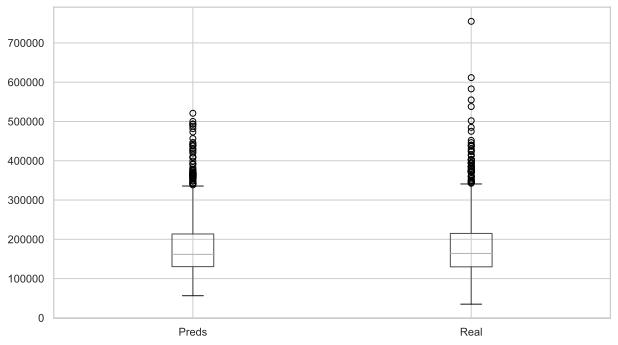

In [72]:
df.boxplot(column=['Preds', 'Real'])

In [73]:
dfs = DataFrameSummary(df)
dfs.summary()

,Preds,Real
count,1000.0,1000.0
mean,180773.210106,182284.451
std,74765.181284,80291.215207
min,56367.678771,34900.0
25%,130467.045666,130000.0
50%,161711.585043,163995.0
75%,213561.023889,215000.0
max,520916.967277,755000.0
counts,1000,1000
uniques,1000,537


In [75]:
from sklearn import metrics as metric
print('Root Mean Squared Error:', np.sqrt(metric.mean_squared_error(np.expm1(metrics['y']), np.expm1(metrics['predictions_proba']))))

Root Mean Squared Error: 26180.783331251747


## Model Explainability


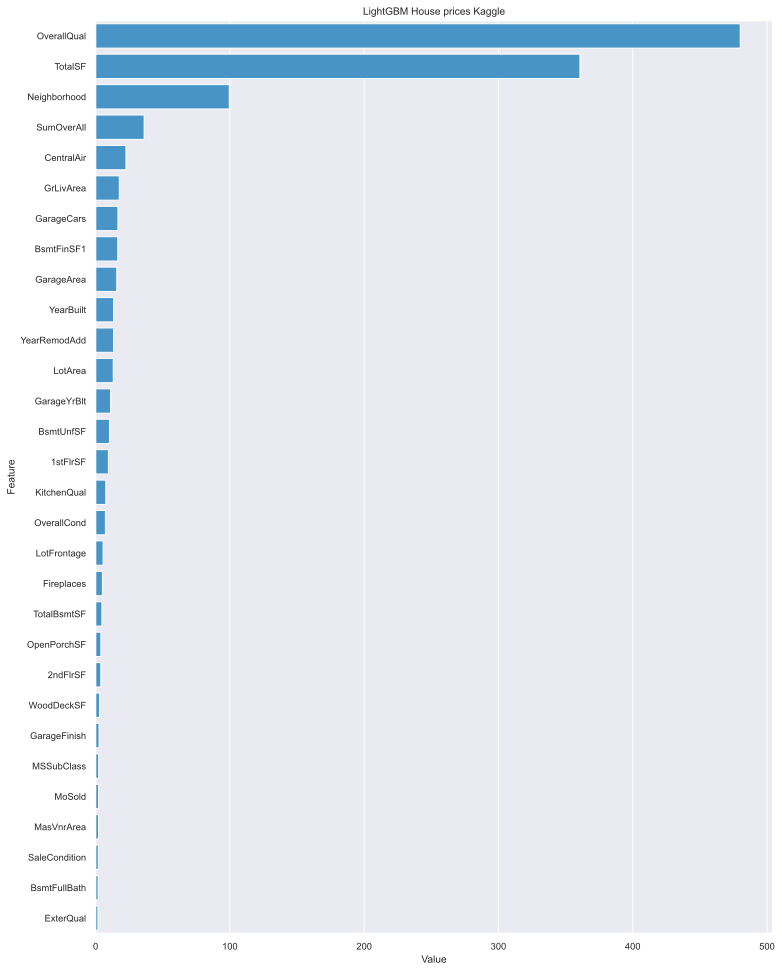

In [77]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'LightGBM House prices Kaggle',num=30)

In [81]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)
top_features

,Value,Feature
16,480.025874,OverallQual
79,360.685610,TotalSF
11,99.528962,Neighborhood
80,36.138228,SumOverAll
40,22.623122,CentralAir
45,17.652933,GrLivArea
60,16.642791,GarageCars
33,16.529396,BsmtFinSF1
61,15.774834,GarageArea
18,13.447281,YearBuilt


In [87]:
X['y']=y

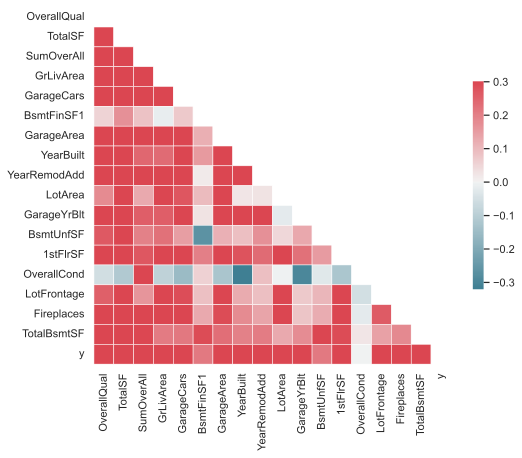

In [88]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('y')
oc.correlations(X,list_for_correlations)